In [22]:
import tensorflow as tf
import os
import glob as gb
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2

In [23]:
data_path='/kaggle/input/number-arabic/Arabic/'

In [24]:
for folder in os.listdir(data_path):
    jpg_files = gb.glob(pathname=str(data_path+ folder + '/*.jpg'))
    png_files = gb.glob(pathname=str(data_path + folder + '/*.png'))
    files = jpg_files + png_files
    print(f'For data, found {len(files)} in folder {folder}')

For data, found 42 in folder 7
For data, found 63 in folder 47
For data, found 62 in folder 17
For data, found 74 in folder 81
For data, found 62 in folder 19
For data, found 64 in folder 22
For data, found 42 in folder 2
For data, found 67 in folder 35
For data, found 74 in folder 92
For data, found 64 in folder 50
For data, found 62 in folder 23
For data, found 66 in folder 87
For data, found 62 in folder 10
For data, found 40 in folder 5
For data, found 66 in folder 61
For data, found 72 in folder 36
For data, found 65 in folder 20
For data, found 61 in folder 45
For data, found 68 in folder 60
For data, found 62 in folder 27
For data, found 67 in folder 64
For data, found 59 in folder 41
For data, found 67 in folder 89
For data, found 66 in folder 39
For data, found 58 in folder 32
For data, found 68 in folder 98
For data, found 61 in folder 25
For data, found 62 in folder 42
For data, found 66 in folder 52
For data, found 67 in folder 75
For data, found 60 in folder 8
For data, fo

In [25]:
def load_data(data_path):
    x = []
    y = []
    s = 100
    for class_dir in os.listdir(data_path):
        class_path = os.path.join(data_path, class_dir)
        for image_name in os.listdir(class_path):
            image_path = os.path.join(class_path, image_name)
            image = cv2.imread(image_path)
            if image is not None:
                image = cv2.resize(image, (s, s))  # Resize to fixed size
                x.append(image)
                y.append(int(class_dir))  # Assuming class directories are named after class labels
    return np.array(x), np.array(y)


In [26]:
code = {'0':0 ,'1':1,'2':2,'3':3,'4':4,'5':5,'6':6,'7':7,'8':8,'9':9,'10':10,'11':11 ,'12':12,'13':13,'14':14,'15':15,'16':16,'17':17,'18':18,'19':19,'20':20,'21':21,'22':22 ,'23':23,'24':24,'25':25,'26':26,'27':27,'28':28,'29':29,'30':30,'31':31,'32':32,'33':33 ,'34':34,'35':35,'36':36,'37':37,'38':38,'39':39,'40':40,'41':41,'42':42,'43':43,'44':44 ,'45':45,'46':46,'47':47,'48':48,'49':49,'50':50,'51':51,'52':52,'53':53,'54':54,'55':55 ,'56':56,'57':57,'58':58,'59':59,'60':60,'61':61,'62':62,'63':63,'64':64,'65':65,'66':66 ,'67':67,'68':68,'69':69,'70':70,'71':71,'72':72,'73':73,'74':74,'75':75,'76':76,'77':77 ,'78':78,'79':79,'80':80,'81':81,'82':82,'83':83,'84':84,'85':85,'86':86,'87':87,'88':88 ,'89':89,'90':91,'92':92,'93':93,'94':94,'95':95,'96':96,'97':97,'98':98,'99':99,'100':100}

def getcode(n) : 
    for x , y in code.items() : 
        if n == y : 
            return x

In [27]:
# Load images and labels
x, y = load_data(data_path)

# Normalize the image data to [0, 1]
x = x.astype('float32') / 255.0

# One-hot encode the labels
num_classes = 102  # Number of classes
y = to_categorical(y, num_classes=num_classes)


In [28]:
# Split dataset into training, validation, and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, shuffle=True)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.1, random_state=42)


In [29]:
print(f'we have {len(x_train)} items in X_train')

we have 4676 items in X_train


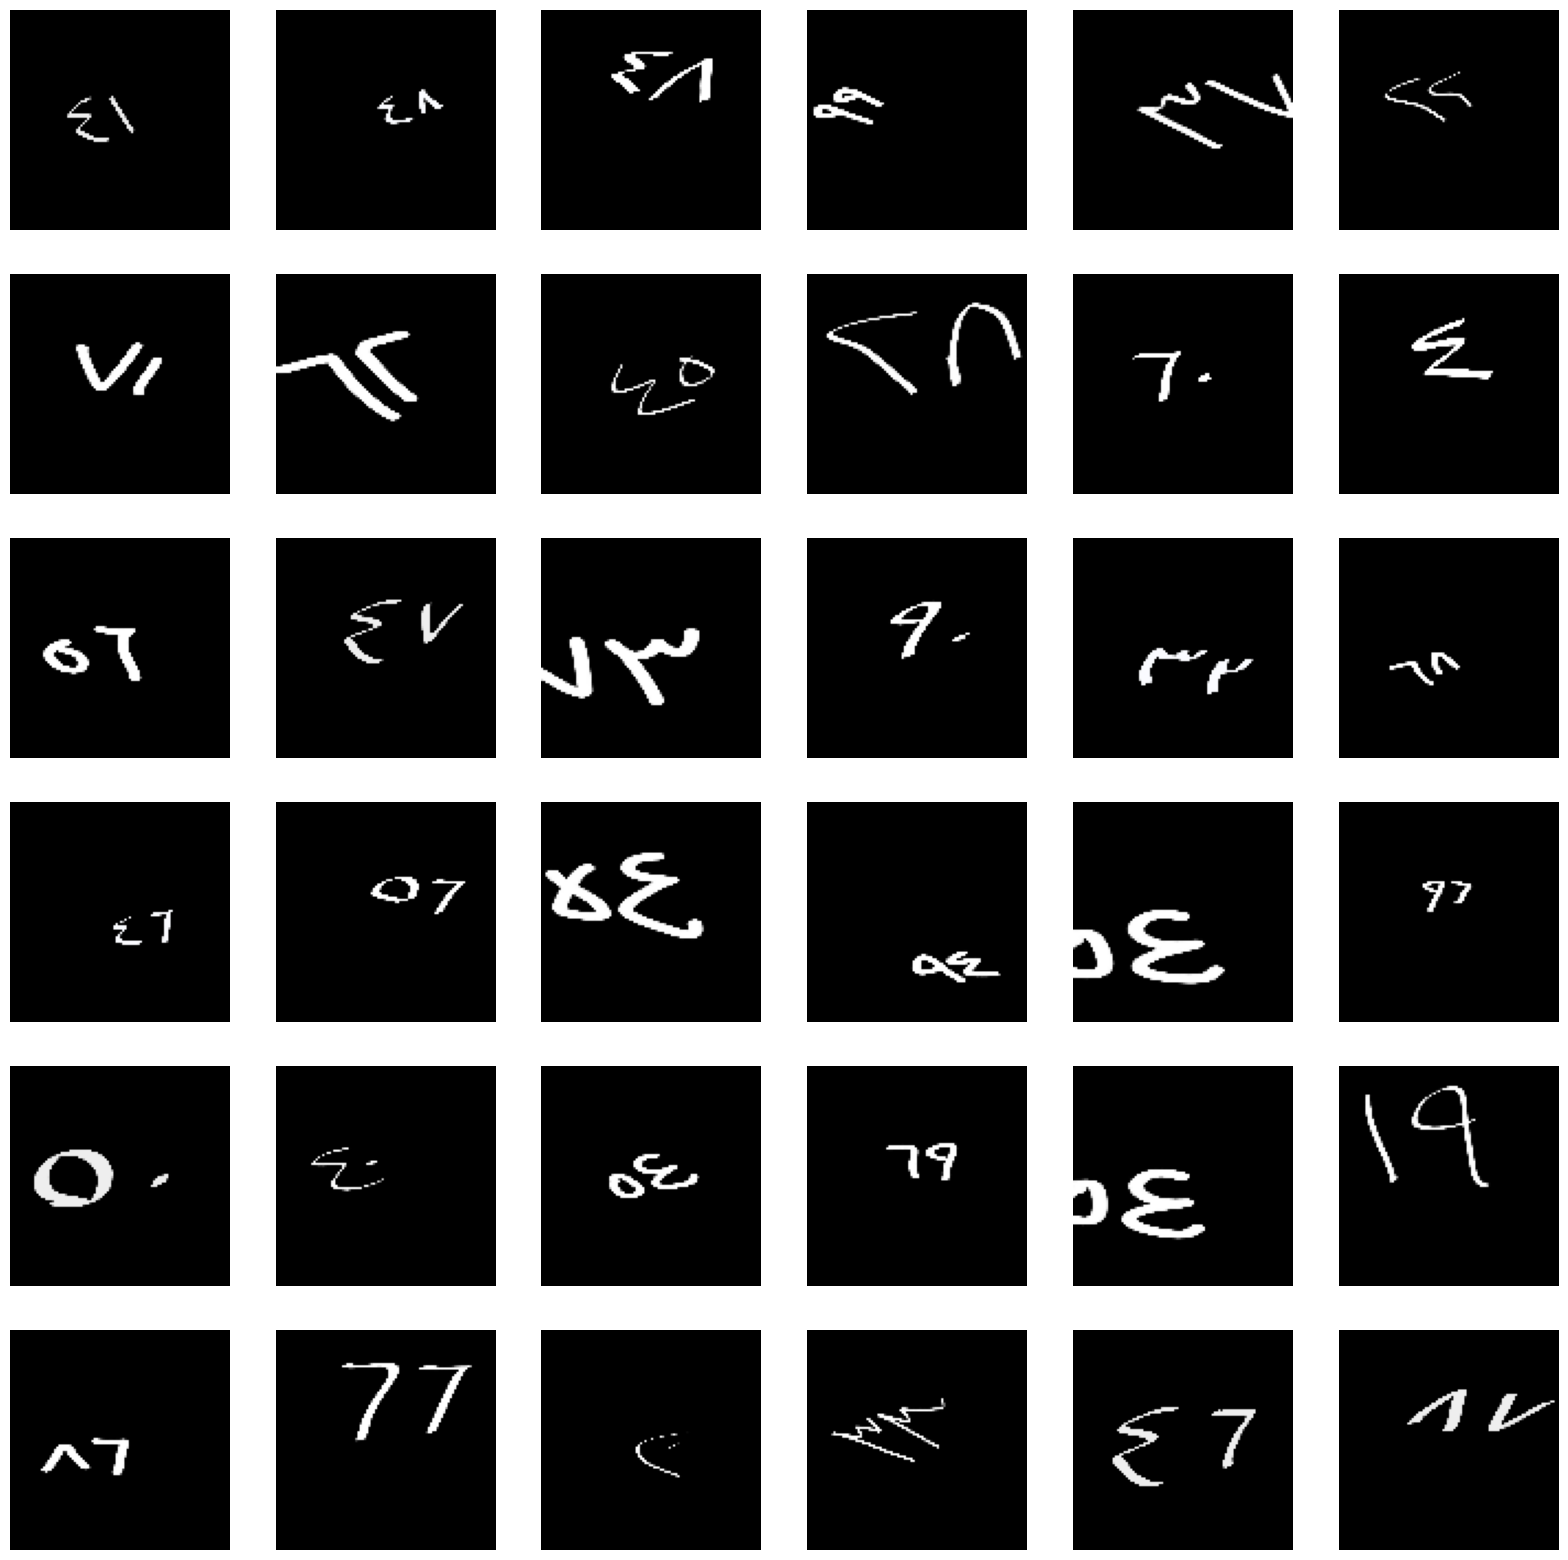

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(x_train),36))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(x_train[i])   
    plt.axis('off')

In [31]:
print(f'we have {len(x_test)} items in x_test')

we have 1300 items in x_test


In [32]:
print(f'we have {len(x_val)} items in x_val')

we have 520 items in x_val


In [33]:

model = Sequential([
    Conv2D(265, (3, 3), activation='relu', input_shape=(100, 100, 3)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    Conv2D(32, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])


In [34]:
from tensorflow.keras.optimizers import Adam

model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])


In [35]:
print('Model Details are:')
print(model.summary())


Model Details are:


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 98, 98, 265)    │         7,420 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 98, 98, 265)    │         1,060 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 49, 49, 265)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 47, 47, 128)    │       305,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 47, 47, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 23, 23, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 21, 21, 64)     │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 21, 21, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 19, 19, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 19, 19, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 9, 9, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2592)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │       663,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 102)            │        26,214 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,097,062 (4.18 MB)

 Trainable params: 1,096,084 (4.18 MB)

 Non-trainable params: 978 (3.82 KB)

None


In [36]:
epochs = 50
history = model.fit(x_train, y_train, epochs=epochs, validation_data=(x_val, y_val), verbose=1)


Epoch 1/50
  5/147 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - accuracy: 0.0000e+00 - loss: 8.3013

W0000 00:00:1719116707.996621    1406 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.0115 - loss: 5.9346

W0000 00:00:1719116716.891001    1406 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


147/147 ━━━━━━━━━━━━━━━━━━━━ 16s 64ms/step - accuracy: 0.0115 - loss: 5.9297 - val_accuracy: 0.0154 - val_loss: 4.7285
Epoch 2/50
147/147 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - accuracy: 0.0355 - loss: 4.5372 - val_accuracy: 0.0115 - val_loss: 4.9861
Epoch 3/50
147/147 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - accuracy: 0.0392 - loss: 4.4421 - val_accuracy: 0.0077 - val_loss: 4.9781
Epoch 4/50
147/147 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - accuracy: 0.0672 - loss: 4.2701 - val_accuracy: 0.0269 - val_loss: 4.5362
Epoch 5/50
147/147 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - accuracy: 0.0942 - loss: 4.1108 - val_accuracy: 0.0673 - val_loss: 4.3777
Epoch 6/50
147/147 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - accuracy: 0.1190 - loss: 3.9575 - val_accuracy: 0.1077 - val_loss: 4.2087
Epoch 7/50
147/147 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - accuracy: 0.1564 - loss: 3.7124 - val_accuracy: 0.0923 - val_loss: 4.1276
Epoch 8/50
147/147 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - accuracy: 0.1831 - loss: 3.5230 - val_accuracy: 0.11

In [37]:
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f'Test accuracy: {accuracy:.4f}')

Test accuracy: 0.3346


In [38]:
y_val = model.predict(x_test)

print('Prediction Shape is {}'.format(y_val.shape))

28/41 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step

W0000 00:00:1719116942.300100    1404 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step
Prediction Shape is (1300, 102)


In [39]:
y_result = model.predict(x_val)

print('Prediction Shape is {}'.format(y_result.shape))

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Prediction Shape is (520, 102)


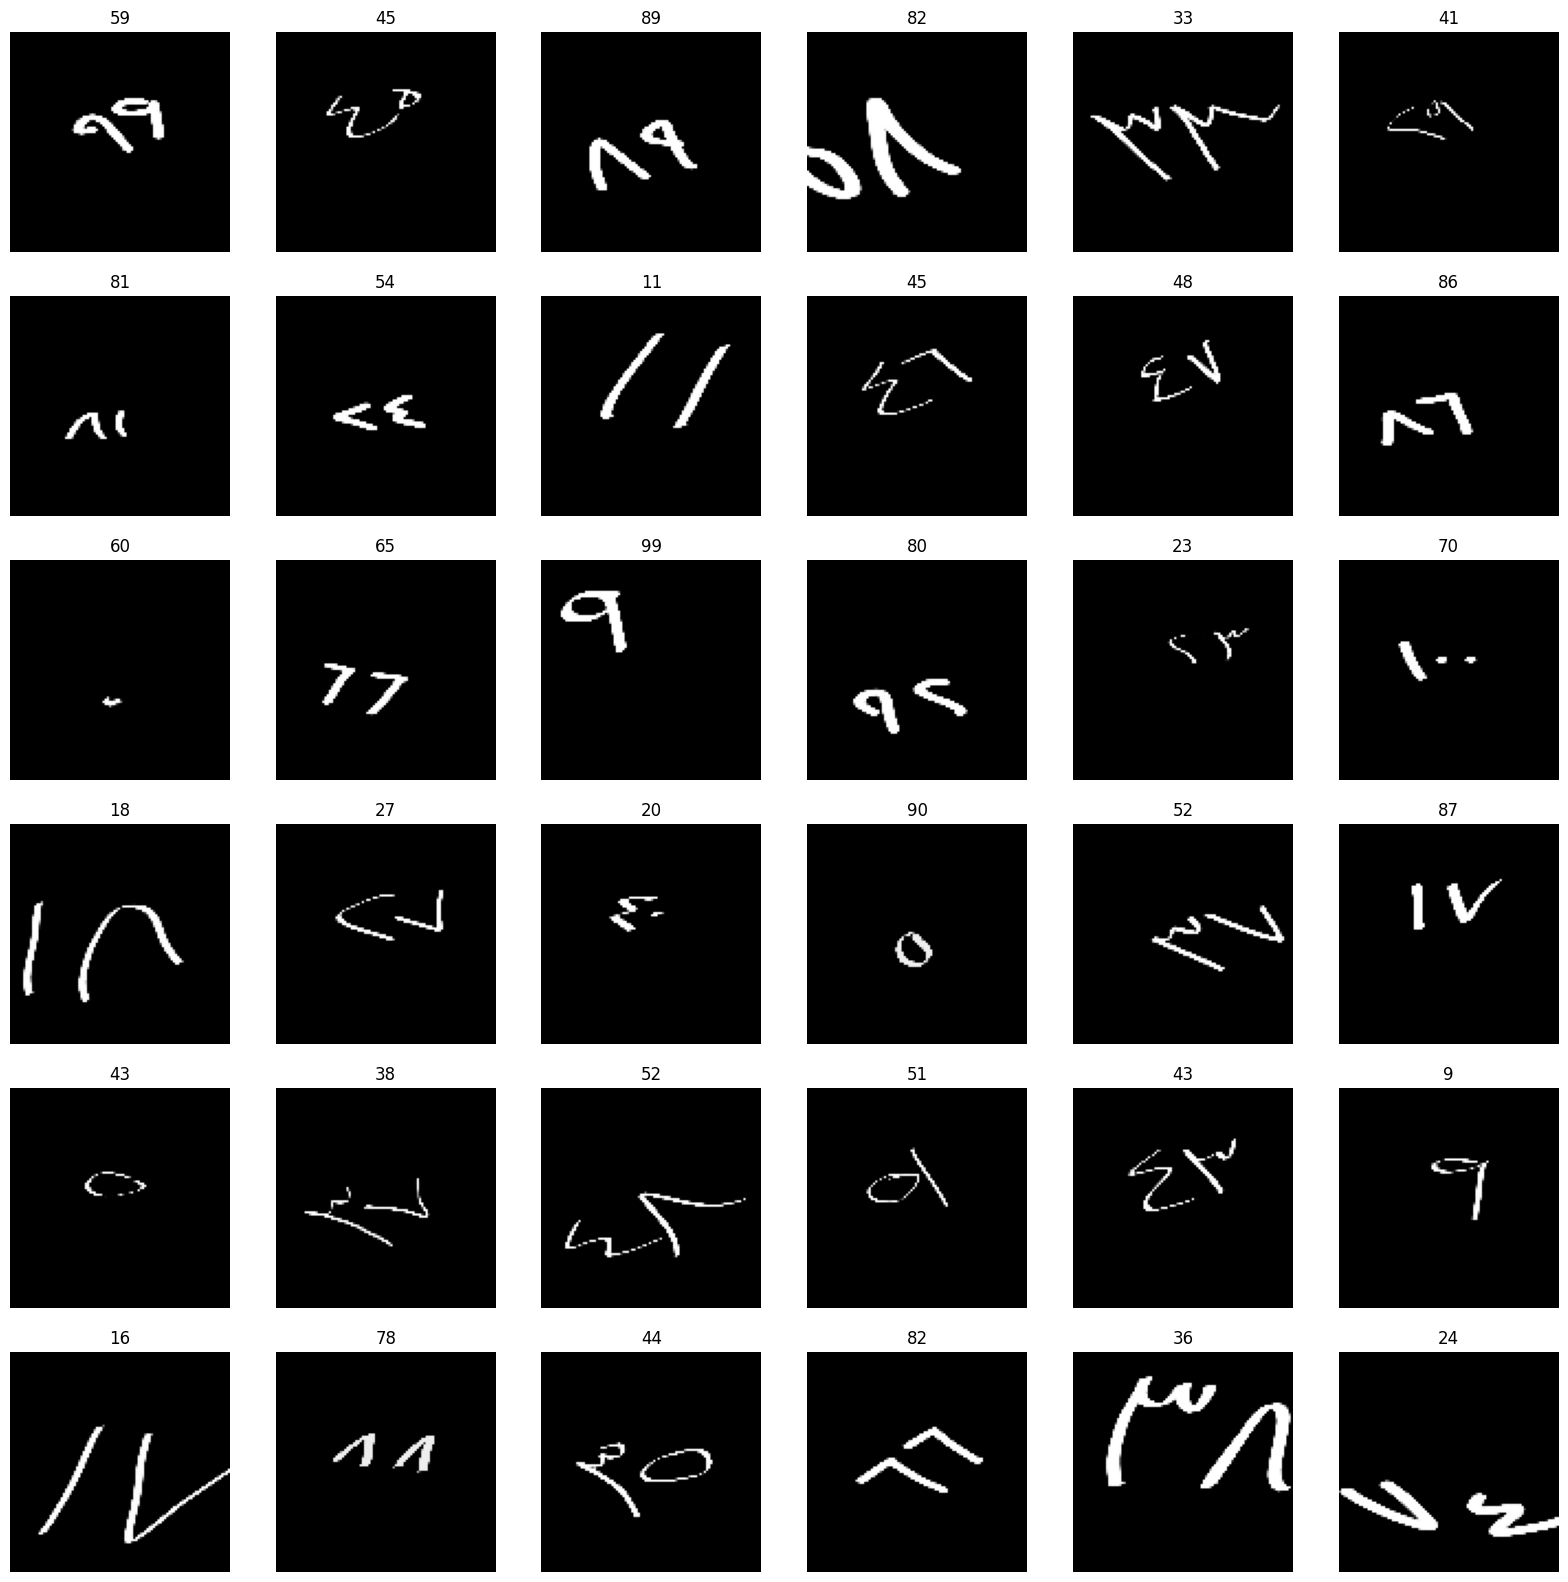

In [40]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(x_val),36))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(x_val[i])    
    plt.axis('off')
    plt.title(getcode(np.argmax(y_result[i])))

In [41]:
# Optionally, you can make predictions on individual images
index = np.random.randint(0, len(x_test))
test_image = x_test[index]
true_label = np.argmax(y_test[index])

# Reshape the image to fit the model input shape if needed
test_image = np.expand_dims(test_image, axis=0)

# Predict the label for the test image
predicted_label = np.argmax(model.predict(test_image), axis=-1)

# Print the true and predicted labels
print(f'True label: {true_label}')
print(f'Predicted label: {predicted_label}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step
True label: 32
Predicted label: [93]


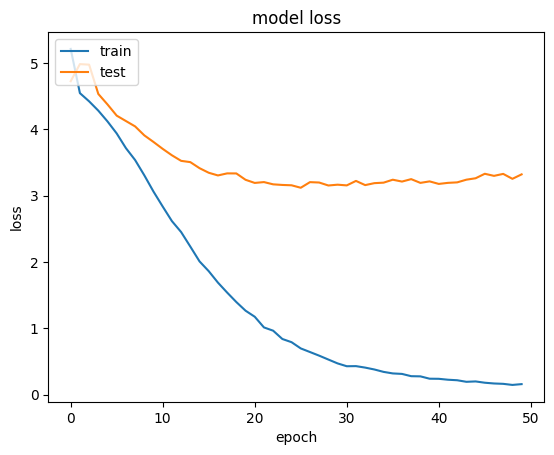

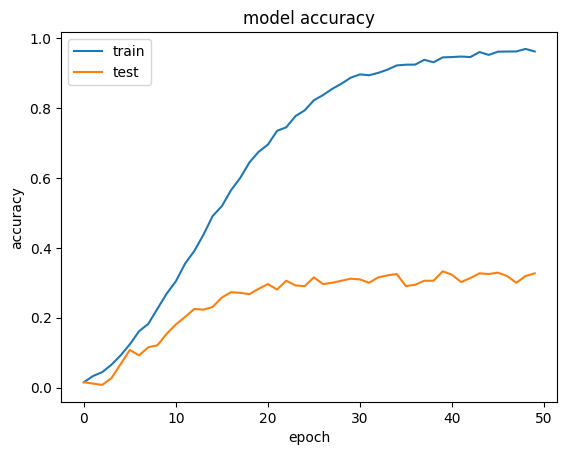

In [42]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.legend(['train', 'test'], loc='upper left')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

plt.figure()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
